In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, pointbiserialr, spearmanr, kendalltau

# Load the dataset
df = pd.read_csv('dataset/FoodAccessResearchAtlasData2019.csv')

In [35]:
cols = [
    'TractSNAP', 'LowIncomeTracts', 'Urban', 'HUNVFlag', 'MedianFamilyIncome', 
    'PovertyRate', 'LAPOP1_10', 'Pop2010', 'GroupQuartersFlag', 'TractKids', 
    'TractSeniors', 'TractWhite', 'TractBlack', 'TractHispanic', 'OHU2010'
]
df_sub = df[cols].dropna()  # Remove missing values

# Calculate Low Access Rate (LAR)
df_sub['LAR'] = df_sub['LAPOP1_10'] / df_sub['Pop2010']

# Calculate Population Density (Population per Housing Unit)
df_sub['PopulationDensity'] = df_sub['Pop2010'] / df_sub['OHU2010']

# Calculate Proportions of Racial/Ethnic Groups
df_sub['WhiteProportion'] = df_sub['TractWhite'] / df_sub['Pop2010']
df_sub['BlackProportion'] = df_sub['TractBlack'] / df_sub['Pop2010']
df_sub['HispanicProportion'] = df_sub['TractHispanic'] / df_sub['Pop2010']

In [36]:
# List of variables to correlate with LAR
variables = [
    'TractSNAP', 'LowIncomeTracts', 'Urban', 'HUNVFlag',
    'MedianFamilyIncome', 'PovertyRate', 'TractKids', 'TractSeniors', 
    'PopulationDensity', 'WhiteProportion', 'BlackProportion', 'HispanicProportion'
]

# Calculate correlations and p-values
correlations = []
p_values = []

for var in variables:
    corr, p = pearsonr(df_sub[var], df_sub['LAR'])
    correlations.append(corr)
    p_values.append(p)

# Create a summary DataFrame
corr_df = pd.DataFrame({
    'Variable': variables,
    'Pearson Correlation': correlations,
    'p-value': p_values
})

print(corr_df)

              Variable  Pearson Correlation        p-value
0            TractSNAP            -0.103479  1.025054e-100
1      LowIncomeTracts            -0.103342  1.874807e-100
2                Urban             0.191356   0.000000e+00
3             HUNVFlag             0.031472   1.020605e-10
4   MedianFamilyIncome             0.115743  1.111621e-125
5          PovertyRate            -0.098736   7.978695e-92
6            TractKids             0.052217   7.418125e-27
7         TractSeniors            -0.009689   4.663317e-02
8    PopulationDensity             0.041526   1.460114e-17
9      WhiteProportion             0.034466   1.450348e-12
10     BlackProportion             0.004812   3.230931e-01
11  HispanicProportion            -0.081904   1.123468e-63


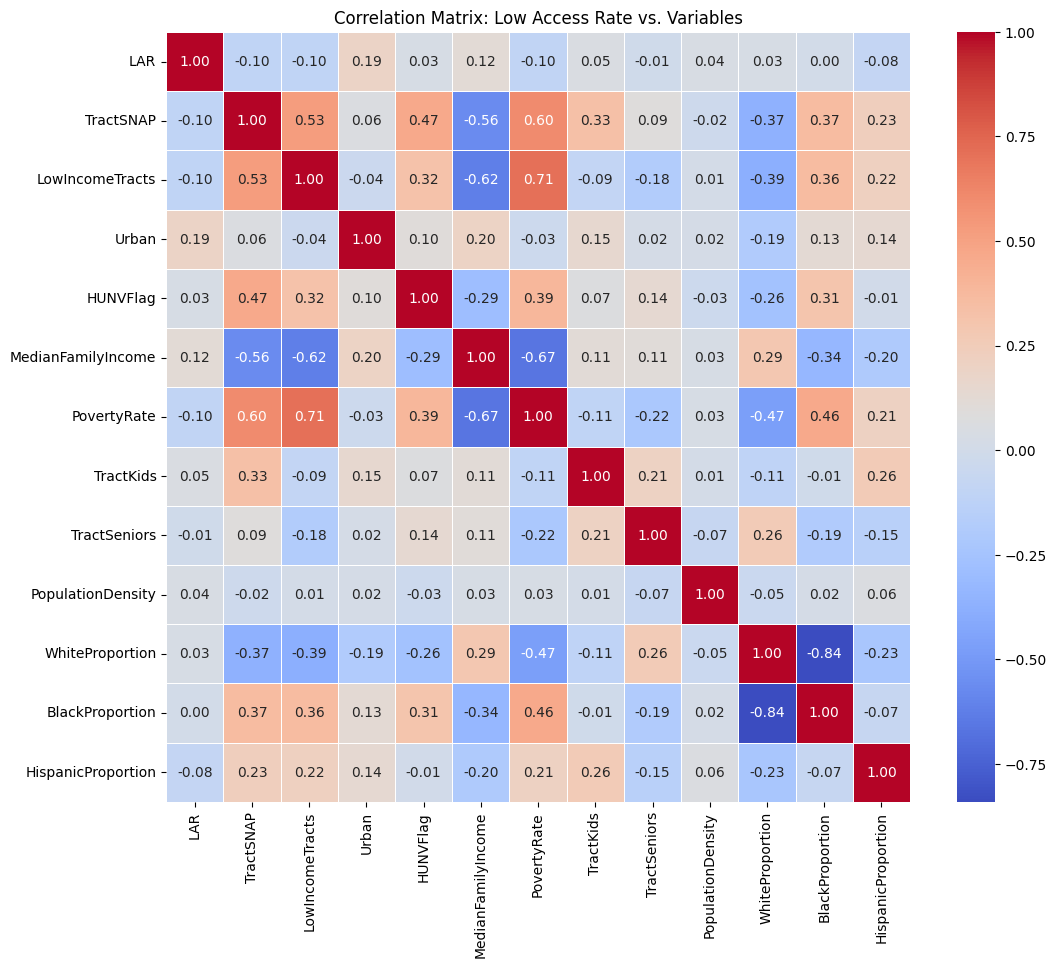

In [37]:
# Create a correlation matrix
corr_matrix = df_sub[['LAR'] + variables].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Low Access Rate vs. Variables')
plt.show()

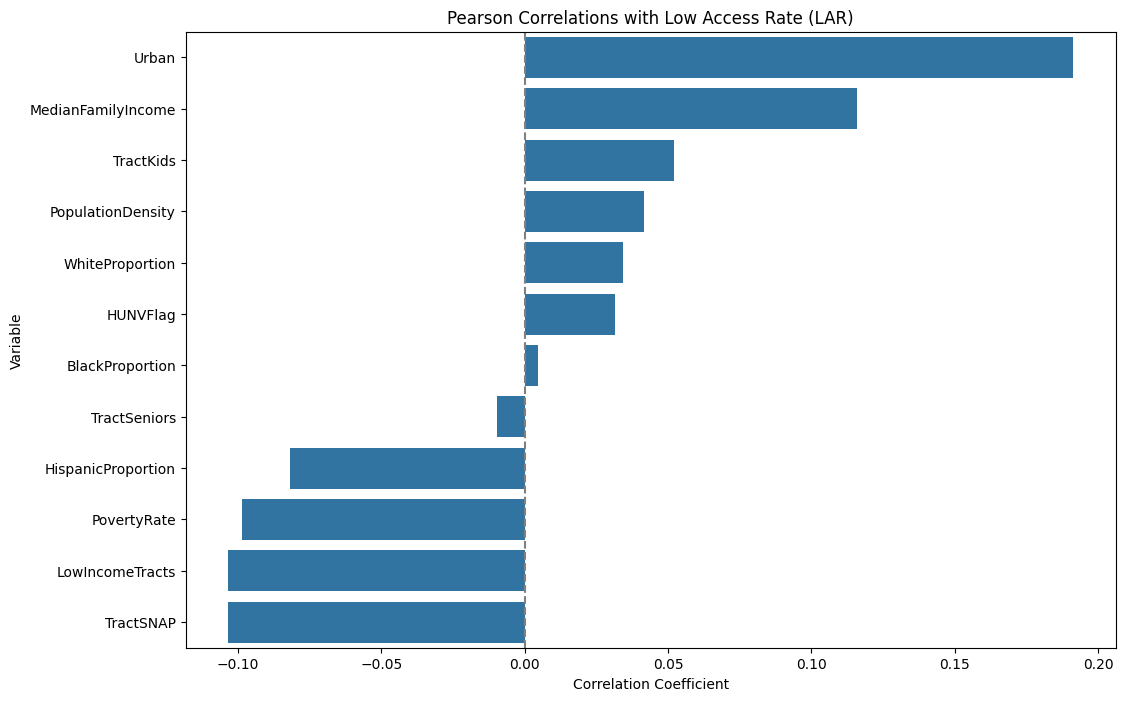

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Pearson Correlation', y='Variable', data=corr_df.sort_values(by='Pearson Correlation', ascending=False))
plt.title('Pearson Correlations with Low Access Rate (LAR)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [41]:

for var in variables:
    corr, p = spearmanr(df_sub[var], df_sub['LAR'])
    correlations.append(corr)
    p_values.append(p)

# Create a summary DataFrame
corr_df = pd.DataFrame({
    'Variable': variables,
    'Spearman Correlation': correlations,
    'p-value': p_values
})

print(corr_df)

              Variable  Spearman Correlation        p-value
0            TractSNAP             -0.128165  6.988705e-154
1      LowIncomeTracts             -0.116202  1.141020e-126
2                Urban              0.203647   0.000000e+00
3             HUNVFlag              0.044573   5.340412e-20
4   MedianFamilyIncome              0.128916  1.107144e-155
5          PovertyRate             -0.153318  4.213271e-220
6    GroupQuartersFlag              0.018091   2.031878e-04
7            TractKids              0.055210   7.837205e-30
8         TractSeniors             -0.008391   8.488848e-02
9    PopulationDensity              0.102984  9.081733e-100
10     WhiteProportion              0.058531   2.515509e-33
11     BlackProportion             -0.011880   1.471267e-02
12  HispanicProportion             -0.072118   9.726421e-50


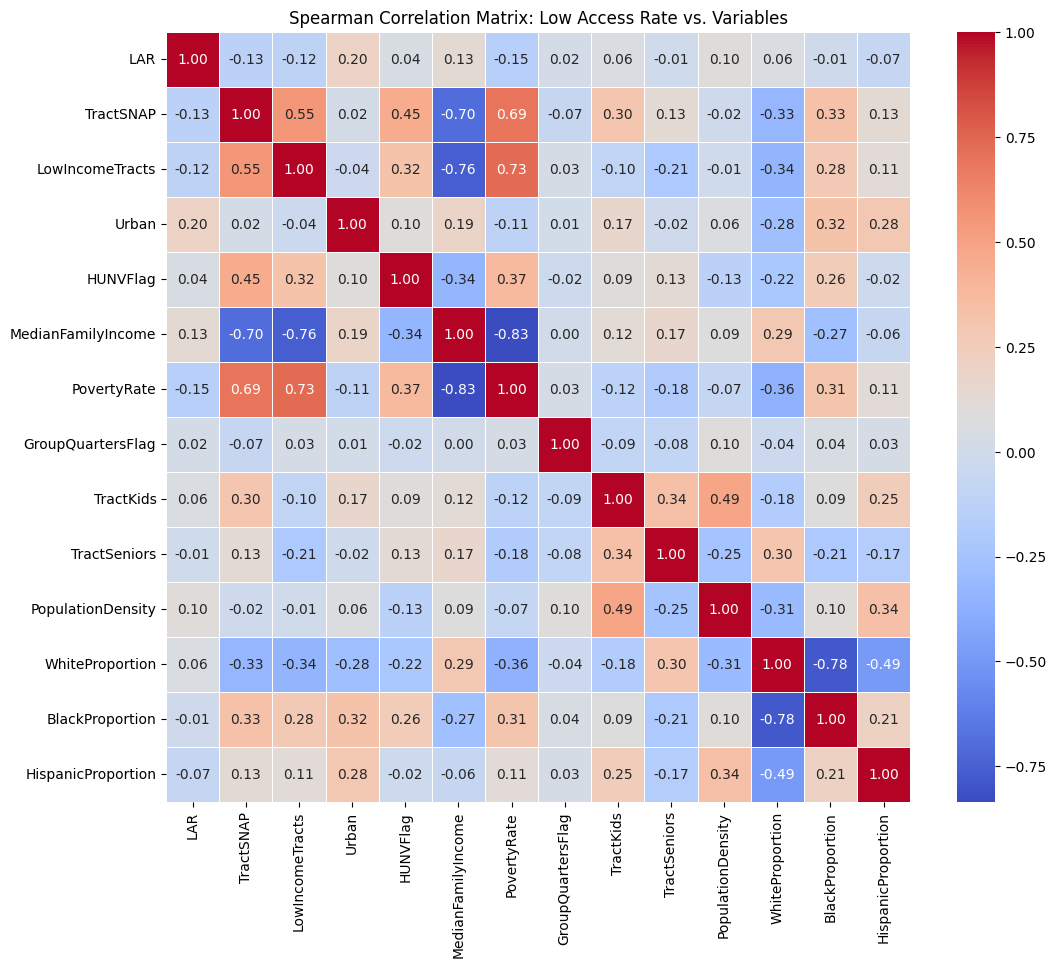

In [43]:
# Create a correlation matrix using Spearman
corr_matrix = df_sub[['LAR'] + variables].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix: Low Access Rate vs. Variables')
plt.show()

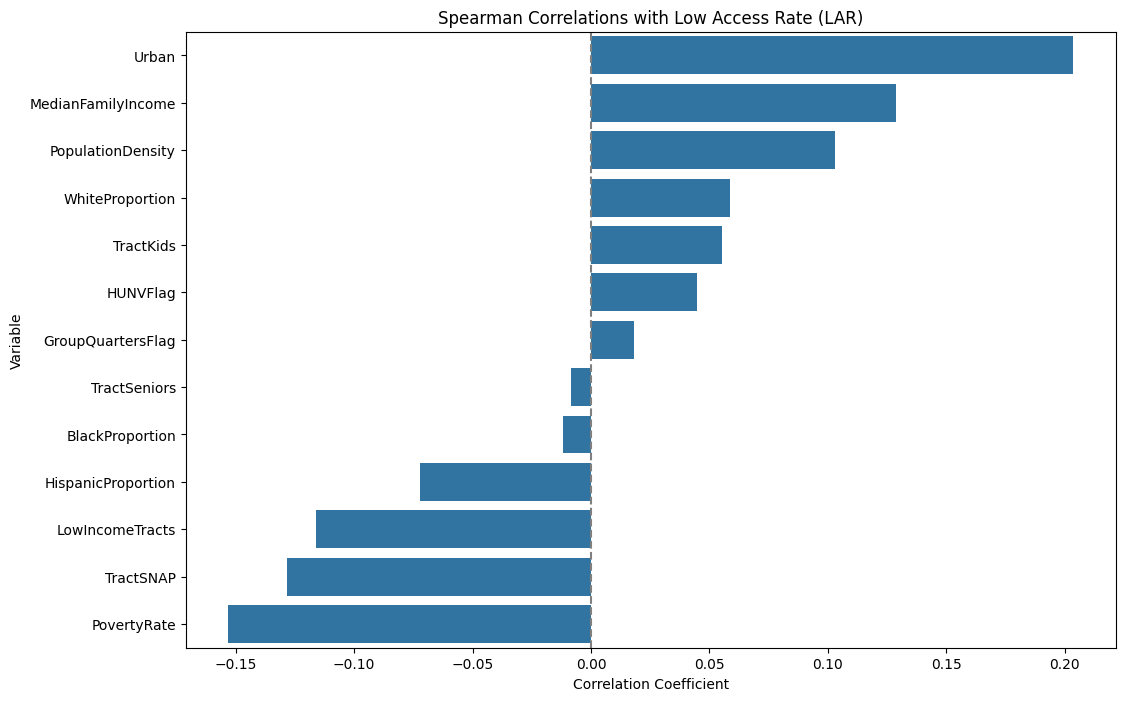

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Spearman Correlation', y='Variable', data=corr_df.sort_values(by='Spearman Correlation', ascending=False))
plt.title('Spearman Correlations with Low Access Rate (LAR)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

In [49]:

for var in variables:
    corr, p = kendalltau(df_sub[var], df_sub['LAR'])
    correlations.append(corr)
    p_values.append(p)

# Create a summary DataFrame
corr_df = pd.DataFrame({
    'Variable': variables,
    'Kendall Correlation': correlations,
    'p-value': p_values
})

print(corr_df)

              Variable  Kendall Correlation        p-value
0            TractSNAP            -0.085848  4.327964e-153
1      LowIncomeTracts            -0.095046  7.880978e-126
2                Urban             0.166571   0.000000e+00
3             HUNVFlag             0.036458   5.561915e-20
4   MedianFamilyIncome             0.086884  3.414590e-157
5          PovertyRate            -0.103616  6.212941e-222
6    GroupQuartersFlag             0.014798   2.033791e-04
7            TractKids             0.038173   8.618071e-32
8         TractSeniors            -0.004556   1.614754e-01
9    PopulationDensity             0.070149  3.610729e-103
10     WhiteProportion             0.039626   3.814337e-34
11     BlackProportion            -0.008011   1.378392e-02
12  HispanicProportion            -0.048285   7.449499e-50


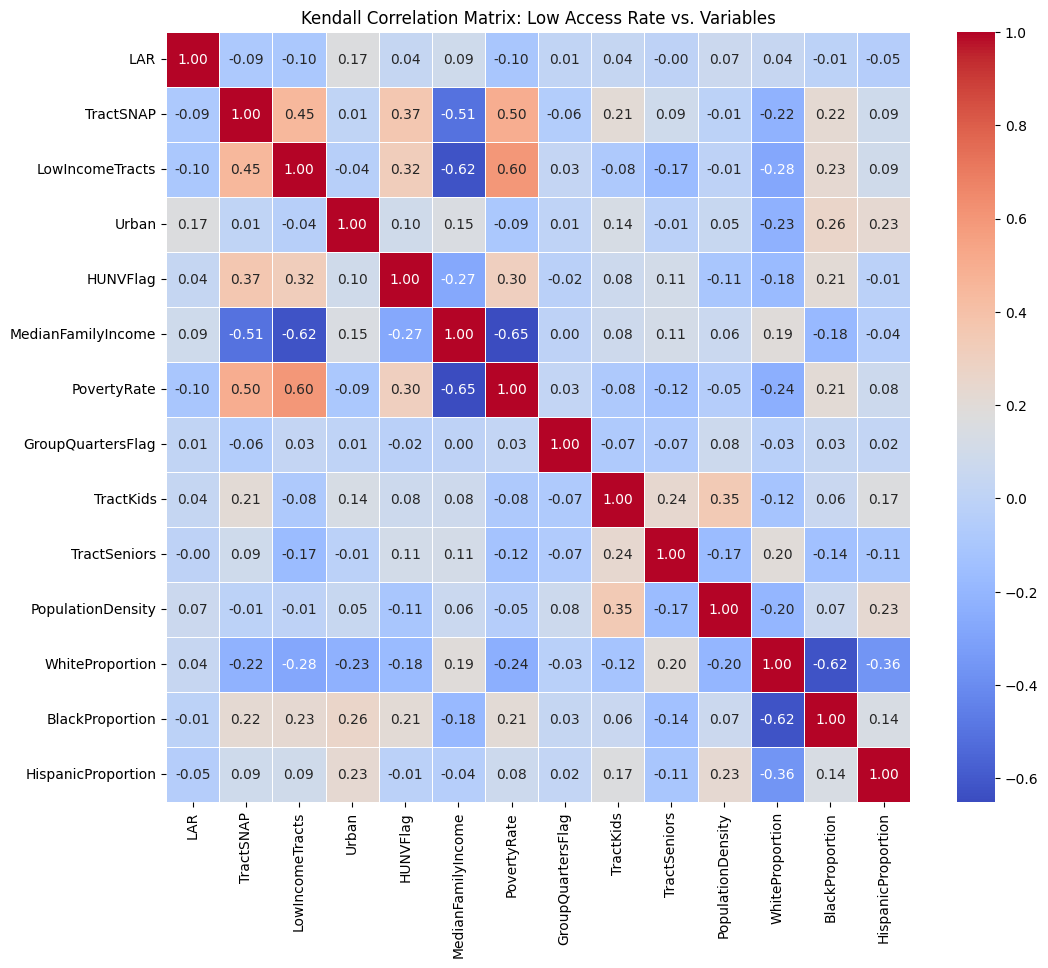

In [50]:
# Create a correlation matrix using Kendall
corr_matrix = df_sub[['LAR'] + variables].corr(method='kendall')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Kendall Correlation Matrix: Low Access Rate vs. Variables')
plt.show()

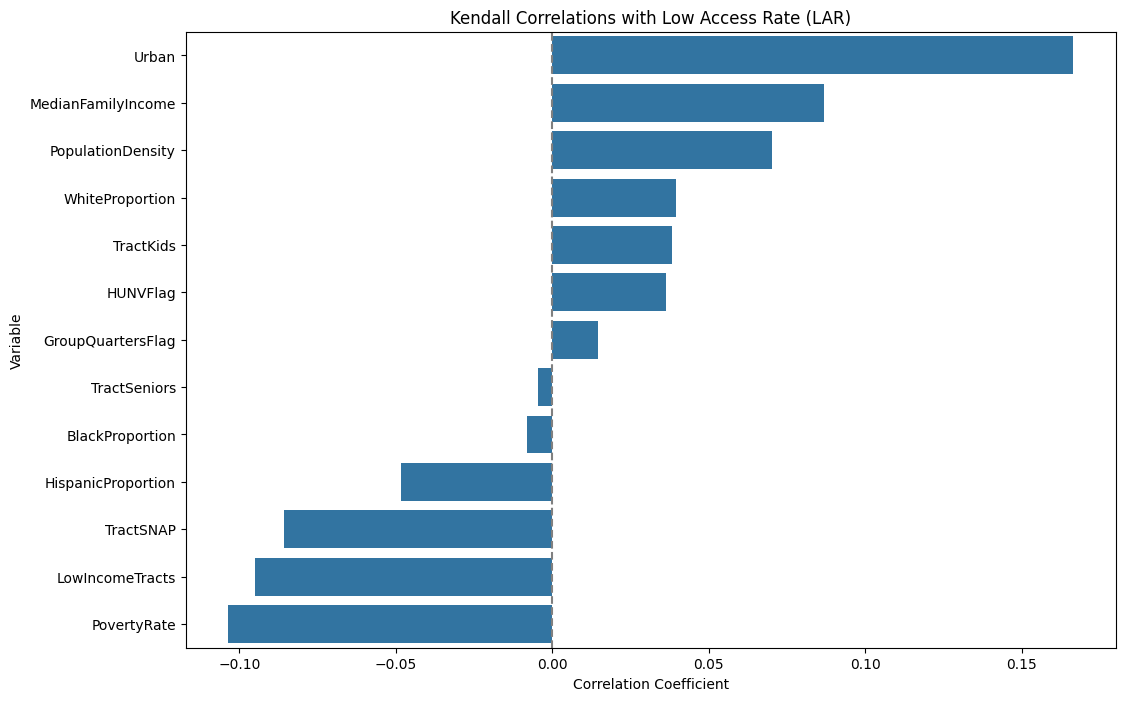

In [51]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Kendall Correlation', y='Variable', data=corr_df.sort_values(by='Kendall Correlation', ascending=False))
plt.title('Kendall Correlations with Low Access Rate (LAR)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
plt.axvline(0, color='gray', linestyle='--')
plt.show()